#  Analyzing Data Science Job Postings on Glassdoor
    (A project to show different data cleaning techniques in Python)

## Problem Overview:
In the competitive landscape of data science job opportunities, candidates often struggle to   
-Identify trends, patterns, and key factors that influence job listings  
-Identify which industries or companies hire data scientists  
-Pay range for data scientists  
-Most required tools for data scientists

This project aims to analyze data science job postings from Glassdoor(USA) to provide valuable insights for job seekers, aspiring data scientists, and employers.

## Project Goals:

1. Clean and preprocess the raw job posting data to make it suitable for analysis.
2. Perform exploratory data analysis to uncover trends, common requirements, and insights into data science job listings.
3. Identify key factors that influence job titles, salaries, and requirements.
4. Provide actionable insights for job seekers looking to improve their qualifications and for employers aiming to optimize their job postings.

## Target Audience:

1. Job Seekers: Insights into the most sought-after skills, qualifications, and industries can help candidates tailor their resumes and preparation strategies.
2. Aspiring Data Scientists: Understanding the expectations of employers can guide individuals in acquiring the right skills.
3. Employers and Recruiters: Insights can help employers optimize their job postings to attract the most qualified candidates.

## Steps Taken in the Project:

Data Cleaning and Preprocessing:
1. Import the datset and relevant libraries
2. Handle missing values, duplicates, outliers and inconsistent formatting.
3. Drop unnecessary columns or Standardize columns

Exploratory Data Analysis (EDA):
1. Explore the distribution of salaries across industries, and locations.
2. Identify the most common skills from the job requirements.
3. Visualize trends and correlations using plots and charts.

In-depth Analysis and Share Insights:
1. Identify industries and Sectors with the highest demand for data science professionals.
2. Analyze how different skills and qualifications impact salary levels.
3. Investigate the relationship between job titles and specific requirements.

## Data Cleaning and Preprocessing:

In [2]:
#importing the relevant libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Uncleaned_DS_jobs.csv")

In [4]:
#to view all the rows
pd.set_option('display.max_rows',None)
df

index                                          Job Title  \
0        0                                  Sr Data Scientist   
1        1                                     Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
5        5                                     Data Scientist   
6        6           Data Scientist / Machine Learning Expert   
7        7                                     Data Scientist   
8        8                   Staff Data Scientist - Analytics   
9        9                                     Data Scientist   
10      10                                     Data Scientist   
11      11                                     Data Scientist   
12      12          Data Scientist - Statistics, Early Career   
13      13                                       Data Modeler   
14      14                                     Data Scientist   
15      15                         Experienced Data Scientist   
16      16                          Data Scientist - Contract   
17      17                                     Data Scientist   
18      18                                    Data Analyst II   
19      19                              Medical Lab Scientist   
20      20                                     Data Scientist   
21      21                    Data Scientist/Machine Learning   
22      22                            Human Factors Scientist   
23      23     Business Intelligence Analyst I- Data Insights   
24      24                                     Data Scientist   
25      25                                     Data Scientist   
26      26                              Data Scientist - Risk   
27      27                     Data Scientist-Human Resources   
28      28                                     Data Scientist   
29      29                                     Data Scientist   
30      30                                     Data Scientist   
31      31           Data Scientist / Machine Learning Expert   
32      32                                     Data Scientist   
33      33       Senior Research Statistician- Data Scientist   
34      34                                      Data Engineer   
35      35                           Associate Data Scientist   
36      36                      Business Intelligence Analyst   
37      37                                     Data Scientist   
38      38                                     Data Scientist   
39      39                      Senior Analyst/Data Scientist   
40      40                                       Data Analyst   
41      41                          Machine Learning Engineer   
42      42                                     Data Analyst I   
43      43                      Scientist - Molecular Biology   
44      44                                     Data Scientist   
45      45          Computational Scientist, Machine Learning   
46      46                              Senior Data Scientist   
47      47                                     Data Scientist   
48      48                                     Data Scientist   
49      49                                     Data Scientist   
50      50                                       Data Analyst   
51      51                                     Data Scientist   
52      52                                     Data Scientist   
53      53                                  Jr. Data Engineer   
54      54                            E-Commerce Data Analyst   
55      55                            Data Analytics Engineer   
56      56                              Senior Data Scientist   
57      57          Product Data Scientist - Ads Data Science   
58      58                                     Data Scientist   
59      59                      Data Scientist - Intermediate   
60      60                              

In [5]:
#to find out how many rows and columns in the dataset
df.shape

(672, 15)

In [6]:
#to find any null values in the dataset
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [7]:
#exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


From the above, there are 15 columns and 672 rows. There are several data types including float, integers and objects.

Few things need to be adjusted for the dataset. These include:

Remove the first column called 'index'
Change Salary Estimate to integer
However, before I start manipulating the data, let's make a copy so that the original dataset remains unaltered

In [8]:
ds = df.copy()
ds

index                                          Job Title  \
0        0                                  Sr Data Scientist   
1        1                                     Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
5        5                                     Data Scientist   
6        6           Data Scientist / Machine Learning Expert   
7        7                                     Data Scientist   
8        8                   Staff Data Scientist - Analytics   
9        9                                     Data Scientist   
10      10                                     Data Scientist   
11      11                                     Data Scientist   
12      12          Data Scientist - Statistics, Early Career   
13      13                                       Data Modeler   
14      14                                     Data Scientist   
15      15                         Experienced Data Scientist   
16      16                          Data Scientist - Contract   
17      17                                     Data Scientist   
18      18                                    Data Analyst II   
19      19                              Medical Lab Scientist   
20      20                                     Data Scientist   
21      21                    Data Scientist/Machine Learning   
22      22                            Human Factors Scientist   
23      23     Business Intelligence Analyst I- Data Insights   
24      24                                     Data Scientist   
25      25                                     Data Scientist   
26      26                              Data Scientist - Risk   
27      27                     Data Scientist-Human Resources   
28      28                                     Data Scientist   
29      29                                     Data Scientist   
30      30                                     Data Scientist   
31      31           Data Scientist / Machine Learning Expert   
32      32                                     Data Scientist   
33      33       Senior Research Statistician- Data Scientist   
34      34                                      Data Engineer   
35      35                           Associate Data Scientist   
36      36                      Business Intelligence Analyst   
37      37                                     Data Scientist   
38      38                                     Data Scientist   
39      39                      Senior Analyst/Data Scientist   
40      40                                       Data Analyst   
41      41                          Machine Learning Engineer   
42      42                                     Data Analyst I   
43      43                      Scientist - Molecular Biology   
44      44                                     Data Scientist   
45      45          Computational Scientist, Machine Learning   
46      46                              Senior Data Scientist   
47      47                                     Data Scientist   
48      48                                     Data Scientist   
49      49                                     Data Scientist   
50      50                                       Data Analyst   
51      51                                     Data Scientist   
52      52                                     Data Scientist   
53      53                                  Jr. Data Engineer   
54      54                            E-Commerce Data Analyst   
55      55                            Data Analytics Engineer   
56      56                              Senior Data Scientist   
57      57          Product Data Scientist - Ads Data Science   
58      58                                     Data Scientist   
59      59                      Data Scientist - Intermediate   
60      60                              

In [9]:
#removing the index column
ds.drop('index',inplace=True,axis=1)

After removing the index column, we can now check for duplicate columns and do more data cleaning

The cleaning will be done on each column to ensure that the data is properly clean

### 1. Job Title
This is the job title for each person

In [10]:
#view unique rows
ds['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [11]:
#how many unique entries are in the 'Job Title' column
ds['Job Title'].nunique()

172

In [12]:
#remove any leading or trailing whitespaces
ds['Job Title'].str.strip()

0                                      Sr Data Scientist
1                                         Data Scientist
2                                         Data Scientist
3                                         Data Scientist
4                                         Data Scientist
5                                         Data Scientist
6               Data Scientist / Machine Learning Expert
7                                         Data Scientist
8                       Staff Data Scientist - Analytics
9                                         Data Scientist
10                                        Data Scientist
11                                        Data Scientist
12             Data Scientist - Statistics, Early Career
13                                          Data Modeler
14                                        Data Scientist
15                            Experienced Data Scientist
16                             Data Scientist - Contract
17                             

From the list of unique job titles, I can see roles that are not data related which need to be removed, so I will create a list of data career keywords and use it to filter out the roles we do not need

In [13]:
# First define a list of relevant data career keywords
data_career_keywords = ['Data', 'Data Scientist', 'Machine Learning', 'Data Analyst' 'Developer','Business Intelligence','Analytics',]

# then filter the job titles with any of the data career keywords
data_careers = ds[ds['Job Title'].str.contains('|'.join(data_career_keywords), case=True)]

In [14]:
# Update 'ds' DataFrame to include only the rows that match the 'data_careers' condition 
ds= ds.loc[data_careers.index]
ds

Job Title  \
0                                    Sr Data Scientist   
1                                       Data Scientist   
2                                       Data Scientist   
3                                       Data Scientist   
4                                       Data Scientist   
5                                       Data Scientist   
6             Data Scientist / Machine Learning Expert   
7                                       Data Scientist   
8                     Staff Data Scientist - Analytics   
9                                       Data Scientist   
10                                      Data Scientist   
11                                      Data Scientist   
12           Data Scientist - Statistics, Early Career   
13                                        Data Modeler   
14                                      Data Scientist   
15                          Experienced Data Scientist   
16                           Data Scientist - Contract   
17                                      Data Scientist   
18                                     Data Analyst II   
20                                      Data Scientist   
21                     Data Scientist/Machine Learning   
23      Business Intelligence Analyst I- Data Insights   
24                                      Data Scientist   
25                                      Data Scientist   
26                               Data Scientist - Risk   
27                      Data Scientist-Human Resources   
28                                      Data Scientist   
29                                      Data Scientist   
30                                      Data Scientist   
31            Data Scientist / Machine Learning Expert   
32                                      Data Scientist   
33        Senior Research Statistician- Data Scientist   
34                                       Data Engineer   
35                            Associate Data Scientist   
36                       Business Intelligence Analyst   
37                                      Data Scientist   
38                                      Data Scientist   
39                       Senior Analyst/Data Scientist   
40                                        Data Analyst   
41                           Machine Learning Engineer   
42                                      Data Analyst I   
44                                      Data Scientist   
45           Computational Scientist, Machine Learning   
46                               Senior Data Scientist   
47                                      Data Scientist   
48                                      Data Scientist   
49                                      Data Scientist   
50                                        Data Analyst   
51                                      Data Scientist   
52                                      Data Scientist   
53                                   Jr. Data Engineer   
54                             E-Commerce Data Analyst   
55                             Data Analytics Engineer   
56                               Senior Data Scientist   
57           Product Data Scientist - Ads Data Science   
58                                      Data Scientist   
59                       Data Scientist - Intermediate   
60                                        Data Analyst   
61                           Machine Learning Engineer   
62                                      Data Scientist   
63                                      Data Scientist   
64                                 Global Data Analyst   
65                                       Data Engineer   
66                                      Data Scientist   
67                                      Data Scientist   
68                   Data & Machine Learning Scientist   
69                   Data Scientist - Machine Learning   
70                              Data Engineer (Remote)   
71   Data Scientist, Applied Machine Learni

In [15]:
# reset the index of the DataFrame after removing the unwanted rows/entries
ds.reset_index(drop=True, inplace=True)
print(ds)

                                             Job Title  \
0                                    Sr Data Scientist   
1                                       Data Scientist   
2                                       Data Scientist   
3                                       Data Scientist   
4                                       Data Scientist   
5                                       Data Scientist   
6             Data Scientist / Machine Learning Expert   
7                                       Data Scientist   
8                     Staff Data Scientist - Analytics   
9                                       Data Scientist   
10                                      Data Scientist   
11                                      Data Scientist   
12           Data Scientist - Statistics, Early Career   
13                                        Data Modeler   
14                                      Data Scientist   
15                          Experienced Data Scientist   
16            

In [16]:
#checking for duplicates
duplicate_rows = ds.duplicated()
print(ds[duplicate_rows])

                     Job Title               Salary Estimate  \
130  Machine Learning Engineer   $90K-$109K (Glassdoor est.)   
131       Senior Data Engineer   $90K-$109K (Glassdoor est.)   
334             Data Scientist  $122K-$146K (Glassdoor est.)   
335             Data Scientist  $122K-$146K (Glassdoor est.)   
336             Data Scientist  $122K-$146K (Glassdoor est.)   
337             Data Scientist  $122K-$146K (Glassdoor est.)   
338             Data Scientist  $122K-$146K (Glassdoor est.)   
363             Data Scientist  $110K-$163K (Glassdoor est.)   
464             Data Scientist   $95K-$119K (Glassdoor est.)   
465             Data Scientist   $95K-$119K (Glassdoor est.)   
466             Data Scientist   $95K-$119K (Glassdoor est.)   
467             Data Scientist   $95K-$119K (Glassdoor est.)   
468             Data Scientist   $95K-$119K (Glassdoor est.)   

                                       Job Description  Rating  \
130  Role Description\nTriplebyte scr

In [17]:
#This shows both the original and duplicate rows
duplicates = ds.duplicated(keep=False)
print(ds[duplicates])

                     Job Title               Salary Estimate  \
126       Senior Data Engineer   $90K-$109K (Glassdoor est.)   
129  Machine Learning Engineer   $90K-$109K (Glassdoor est.)   
130  Machine Learning Engineer   $90K-$109K (Glassdoor est.)   
131       Senior Data Engineer   $90K-$109K (Glassdoor est.)   
333             Data Scientist  $122K-$146K (Glassdoor est.)   
334             Data Scientist  $122K-$146K (Glassdoor est.)   
335             Data Scientist  $122K-$146K (Glassdoor est.)   
336             Data Scientist  $122K-$146K (Glassdoor est.)   
337             Data Scientist  $122K-$146K (Glassdoor est.)   
338             Data Scientist  $122K-$146K (Glassdoor est.)   
362             Data Scientist  $110K-$163K (Glassdoor est.)   
363             Data Scientist  $110K-$163K (Glassdoor est.)   
463             Data Scientist   $95K-$119K (Glassdoor est.)   
464             Data Scientist   $95K-$119K (Glassdoor est.)   
465             Data Scientist   $95K-$1

In [18]:
#dropping the duplicated rows
ds= ds.drop_duplicates()

ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 623
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          611 non-null    object 
 1   Salary Estimate    611 non-null    object 
 2   Job Description    611 non-null    object 
 3   Rating             611 non-null    float64
 4   Company Name       611 non-null    object 
 5   Location           611 non-null    object 
 6   Headquarters       611 non-null    object 
 7   Size               611 non-null    object 
 8   Founded            611 non-null    int64  
 9   Type of ownership  611 non-null    object 
 10  Industry           611 non-null    object 
 11  Sector             611 non-null    object 
 12  Revenue            611 non-null    object 
 13  Competitors        611 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 71.6+ KB


In [19]:
ds['Job Title'].value_counts()

Data Scientist                                                                              326
Data Engineer                                                                                26
Senior Data Scientist                                                                        19
Machine Learning Engineer                                                                    15
Data Analyst                                                                                 12
Senior Data Analyst                                                                           6
Senior Data Engineer                                                                          4
Data Scientist - TS/SCI FSP or CI Required                                                    4
Data Science Software Engineer                                                                4
Data Scientist - TS/SCI Required                                                              3
Senior Data Scientist – Image Analytics,

We can choose to clean the columns further by updating all rows that have 'Data Scientist' or 'Data Science' 
in them with the value 'Data Scientist'

Also we can repeat same for 'Data Analyst' and 'Machine Learning' respectively


But first there are a lot of parenthesis and other symbols in the titles, let us have a look and decide to delete them or not

In [20]:
#fiter job titles with '\([^()]+\)' in their name
filtered_jobs = ds[ds["Job Title"].str.contains('\([^()]+\)', regex=True)]

filtered_job_titles = filtered_jobs["Job Title"]
print(filtered_job_titles)


67                                Data Engineer (Remote)
75                                Data Scientist 3 (718)
89                                (Sr.) Data Scientist -
102                   Sr Data Engineer (Sr BI Developer)
108                              Data Scientist (TS/SCI)
169    Jr. Business Data Analyst (position added 6/12...
202                    Data Modeler (Analytical Systems)
356                    Data Modeler (Analytical Systems)
357          Data Engineer (Analytics, SQL, Python, AWS)
365    Software Engineer (Data Scientist, C,C++,Linux...
370                      Data Scientist (TS/SCI w/ Poly)
372                          Cloud Data Engineer (Azure)
476           Senior Principal Data Scientist (Python/R)
479          Data Scientist(s)/Machine Learning Engineer
507                    Data Modeler (Analytical Systems)
511          Data Engineer (Analytics, SQL, Python, AWS)
512                               Data Scientist 3 (718)
516    Software Engineer - Mach

It appears like the information in parenthesis is not relevant to the job titles, except for where we have (Sr.).

So I will replace the (Sr.) with Senior and delete all other occurences of parenthesis and other symbols

In [21]:
ds["Job Title"]= ds.loc[:,"Job Title"].str.replace("(Sr.)","Senior ")

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\4159789651.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ds["Job Title"]= ds.loc[:,"Job Title"].str.replace("(Sr.)","Senior ")
C:\Users\HP\AppData\Local\Temp\ipykernel_2540\4159789651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["Job Title"]= ds.loc[:,"Job Title"].str.replace("(Sr.)","Senior ")


In [22]:
# Remove all other occurrences of parenthesis from the 'Job Title' column
ds['Job Title'] = ds['Job Title'].str.replace(r'\([^()]+\)', '', regex=True)

#confirm that the column has been updated
ds['Job Title'].value_counts()


C:\Users\HP\AppData\Local\Temp\ipykernel_2540\3990348521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Job Title'] = ds['Job Title'].str.replace(r'\([^()]+\)', '', regex=True)


Data Scientist                                                         326
Data Engineer                                                           26
Senior Data Scientist                                                   21
Machine Learning Engineer                                               15
Data Analyst                                                            12
Senior Data Analyst                                                      7
Senior Data Engineer                                                     4
Data Scientist - TS/SCI FSP or CI Required                               4
Data Science Software Engineer                                           4
Analytics - Business Assurance Data Analyst                              3
Senior Data Scientist – Image Analytics, Novartis AI Innovation Lab      3
Senior Business Intelligence Analyst                                     3
Senior  ML/Data Scientist - AI/NLP/Chatbot                               3
Data Engineer            

In [23]:
# Define a function to update job titles based on specific patterns
def update_job_titles(title):
    if pd.notna(title):
        title = title.lower()
        if 'data science' in title or 'data scientist' in title or 'software engineer' in title:
            return 'Data Scientist' + (' - Senior' if 'senior' in title else '')
        elif 'data analyst' in title or 'data analysis' in title or 'data insights analyst' in title:
            return 'Data Analyst'+ (' - Senior' if 'senior' in title else '')
        elif 'business intelligence'in title:
            return 'Business Intelligence Analyst'+ (' - Senior' if 'senior' in title else '')
        elif 'ml' in title or 'ai' in title or 'machine learning' in title:
            return 'Machine Learning Engineer'+ (' - Senior' if 'senior' in title else '')
        elif 'data engineer' in title or 'data analytics engineer' in title or 'data integration and modeling engineer' in title or 'production engineer - statistics/data analysis' in title or 'principal data & analytics platform engineer' in title:
            return 'Data Engineer'+ (' - Senior' if 'senior' in title else '')
        elif 'analytics manager' in title:
            return 'Analytics Manager'
        elif 'data modeler' in title:
            return 'Data Modeler'
        elif 'data architect' in title:
            return 'Data Architect'
        else:
            updated_title = title      
    
        if re.search(r'\b(lead|head|manager|vp)\b', title):
            role_match = re.search(r'\b(lead|head|manager|vp)\b', title).group(0)
            updated_title = f'{role_match.title()} {updated_title}'
            
        return updated_title
    
# Apply the update_job_titles function to the 'Job_Title' column
ds['Updated_Job_Title'] = ds['Job Title'].apply(update_job_titles)



C:\Users\HP\AppData\Local\Temp\ipykernel_2540\2656529789.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Updated_Job_Title'] = ds['Job Title'].apply(update_job_titles)


In [24]:
ds['Updated_Job_Title'] 

0                                Data Scientist - Senior
1                                         Data Scientist
2                                         Data Scientist
3                                         Data Scientist
4                                         Data Scientist
5                                         Data Scientist
6                                         Data Scientist
7                                         Data Scientist
8                                         Data Scientist
9                                         Data Scientist
10                                        Data Scientist
11                                        Data Scientist
12                                        Data Scientist
13                                          Data Modeler
14                                        Data Scientist
15                                        Data Scientist
16                                        Data Scientist
17                             

In [25]:
ds['Updated_Job_Title'].value_counts()

Data Scientist                                             423
Data Engineer                                               44
Data Scientist - Senior                                     40
Data Analyst                                                37
Machine Learning Engineer                                   27
Data Analyst - Senior                                       12
Machine Learning Engineer - Senior                           7
Data Modeler                                                 5
Data Engineer - Senior                                       5
Business Intelligence Analyst                                3
Analytics Manager                                            3
Business Intelligence Analyst - Senior                       3
Data Architect                                               1
vice president, biometrics and clinical data management      1
Name: Updated_Job_Title, dtype: int64

### 2. Salary Estimate

This is the salary range for each of the job posted

In [26]:
'''We will be converting the salary estimate from object to int by creating 3 new columns to extract the lower
and upper salary band as well as the average salary per job posting'''

# starting with extracting only the salary values and remove any text after '(' 
ds.loc[:, 'Salary Estimate'] = ds['Salary Estimate'].apply(lambda x: x.split('(')[0])
ds.loc[:, 'Salary Estimate'] = ds['Salary Estimate'].apply(lambda x: x.replace('K', '').replace('$', ''))


C:\Users\HP\AppData\Local\Temp\ipykernel_2540\1593672954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.loc[:, 'Salary Estimate'] = ds['Salary Estimate'].apply(lambda x: x.split('(')[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_2540\1593672954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.loc[:, 'Salary Estimate'] = ds['Salary Estimate'].apply(lambda x: x.replace('K', '').replace('$', ''))


In [27]:
# Extract minimum salary from 'Salary Estimate' and convert to integer
ds['Min Salary'] = ds['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))

# Extract maximum salary from 'Salary Estimate' and convert to integer
ds['Max Salary'] = ds['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))

# Calculate average salary
ds['Avg Salary'] = (ds['Min Salary'] + ds['Max Salary']) / 2

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\2523128412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Min Salary'] = ds['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_2540\2523128412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Max Salary'] = ds['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))
C:\Users\HP\AppData\Local\Temp\ipykernel_2540\2523128412.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

### 3. Job Description

This is the job description for the jobs listed

In [72]:
#to view all the rows


ds['Job Description']

0      Description\n\nThe Senior Data Scientist is re...
1      Secure our Nation, Ignite your Future\n\nJoin ...
2      Overview\n\n\nAnalysis Group is one of the lar...
3      JOB DESCRIPTION:\n\nDo you have a passion for ...
4      Data Scientist\nAffinity Solutions / Marketing...
5      About Us:\n\nHeadquartered in beautiful Santa ...
6      Posting Title\nData Scientist / Machine Learni...
7      Introduction\n\nHave you always wanted to run ...
8      Intuit is seeking a Staff Data Scientist to co...
9      Ready to write the best chapter of your career...
10     Join our team dedicated to developing and exec...
11     About Us\n\n\nInterested in working for a huma...
12     *Organization and Job ID**\nJob ID: 310918\n\n...
13     POSITION PURPOSE:\n\nThe Data Architect/Data M...
14     Position Description:\n\nWant to make a differ...
15     *******Please Apply using this link: https://a...
16     We are an ambitious, well-funded startup with ...
17     Job Success Profile\n\nD

There are several tools identified from the job description required from a data scientist, so I have identified a number of tools from Coursera and we will create columns for each tool, then iterate through the job description to find the occurence of these tools in each role.

The tools include: 
Statistics/Programming language- Python, R, SAS \n
Visualization- Power BI, Tableau, Excel \n
Big data- Apache Spark, Hadoop \n
SQL

In [29]:
# List of keywords to search for
keywords = ['Python', 'R','SAS','Excel','SQL','Power BI', 'Tableau', 'SQL', 'Hadoop', 'Spark']

# Create columns for each keyword and fill them with 0 initially
for keyword in keywords:
    ds[keyword] = 0

# Iterate through the keywords and update the corresponding column if keyword is found
for keyword in keywords:
    ds[keyword] = ds['Job Description'].str.contains(keyword, case=False, na=False).astype(int)


C:\Users\HP\AppData\Local\Temp\ipykernel_2540\3439428379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[keyword] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_2540\3439428379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[keyword] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_2540\3439428379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [30]:
#I am curious to know if the roles are remote so I will write a function to check for keywords in job description
def check_keywords(description):
    keywords = []
    if 'remote' in description.lower():
        keywords.append('Remote')
    if 'hybrid' in description.lower():
        keywords.append('Hybrid')
    if 'office' in description.lower():
        keywords.append('Office')
    return ', '.join(keywords) if keywords else 'Not Specified'

# Create a new column 'Location_Preference' and apply the function to the 'Job Description' column
ds['Work_Preference'] = ds['Job Description'].apply(check_keywords)

ds['Work_Preference']


C:\Users\HP\AppData\Local\Temp\ipykernel_2540\1301660103.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Work_Preference'] = ds['Job Description'].apply(check_keywords)


0       Not Specified
1       Not Specified
2              Office
3       Not Specified
4       Not Specified
5       Not Specified
6       Not Specified
7       Not Specified
8       Not Specified
9       Not Specified
10      Not Specified
11      Not Specified
12      Not Specified
13      Not Specified
14     Remote, Office
15      Not Specified
16      Not Specified
17             Remote
18      Not Specified
19             Office
20      Not Specified
21      Not Specified
22             Office
23      Not Specified
24      Not Specified
25      Not Specified
26      Not Specified
27      Not Specified
28             Office
29      Not Specified
30      Not Specified
31      Not Specified
32             Remote
33             Office
34      Not Specified
35      Not Specified
36      Not Specified
37             Hybrid
38             Office
39      Not Specified
40      Not Specified
41             Office
42      Not Specified
43      Not Specified
44      Not Specified
45      No

From the above, I can see that not a lot of company specified the work preference in the job description because there are a lot of "Not Specified"

In [31]:
pd.set_option('display.max_colwidth', 50)

ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 623
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          611 non-null    object 
 1   Salary Estimate    611 non-null    object 
 2   Job Description    611 non-null    object 
 3   Rating             611 non-null    float64
 4   Company Name       611 non-null    object 
 5   Location           611 non-null    object 
 6   Headquarters       611 non-null    object 
 7   Size               611 non-null    object 
 8   Founded            611 non-null    int64  
 9   Type of ownership  611 non-null    object 
 10  Industry           611 non-null    object 
 11  Sector             611 non-null    object 
 12  Revenue            611 non-null    object 
 13  Competitors        611 non-null    object 
 14  Updated_Job_Title  611 non-null    object 
 15  Min Salary         611 non-null    int64  
 16  Max Salary         611 non

### 4. Rating

This column should show the rating of the company in Glassdoor. 5 being the highest and 1 the least.

In [32]:
ds['Rating']

0      3.1
1      4.2
2      3.8
3      3.5
4      2.9
5      4.2
6      3.9
7      3.5
8      4.4
9      3.6
10     4.5
11     4.7
12     3.7
13     3.1
14     3.4
15     4.4
16     4.1
17     3.5
18     4.2
19     3.2
20     4.3
21     3.5
22     3.4
23     4.7
24     4.2
25     3.8
26     4.5
27     2.8
28     3.8
29     3.9
30     5.0
31     4.8
32     3.6
33     3.3
34     2.7
35     2.7
36     2.2
37     3.4
38     3.1
39     3.4
40     2.6
41     4.2
42     4.1
43     4.8
44     3.3
45     3.7
46     4.3
47     4.8
48     3.7
49     4.0
50     4.8
51     3.5
52     3.7
53     3.5
54     4.1
55     3.2
56     4.5
57     3.8
58     4.5
59     3.5
60     4.2
61     3.8
62     3.7
63     3.7
64     4.0
65     3.3
66     2.5
67     4.2
68     3.3
69     4.0
70     3.7
71     3.4
72     3.1
73     3.5
74     2.9
75     3.3
76     4.0
77     3.6
78     4.7
79     4.9
80     4.3
81     4.0
82     2.6
83     4.5
84     4.8
85     3.9
86     4.0
87     4.4
88     4.2
89     3.6
90     3.4

The column appears clean, so I will move on to the next column.

### 5. Company name

This column shows the name of the company for the job description posted

In [33]:
ds['Company Name']

0                                       Healthfirst\n3.1
1                                           ManTech\n4.2
2                                    Analysis Group\n3.8
3                                           INFICON\n3.5
4                                Affinity Solutions\n2.9
5                                       HG Insights\n4.2
6                                          Novartis\n3.9
7                                            iRobot\n3.5
8                                     Intuit - Data\n4.4
9                                XSELL Technologies\n3.6
10                                          Novetta\n4.5
11                                         1904labs\n4.7
12                                             PNNL\n3.7
13                             Old World Industries\n3.1
14                      Mathematica Policy Research\n3.4
15             Guzman & Griffin Technologies (GGTI)\n4.4
16                           Upside Business Travel\n4.1
17                             

In [34]:
#The company name is merged with the rating, seperated by \n so we will seperate them and retain only the company name

ds['Company Name'] = ds['Company Name'].str.split('\n', n=1).str[0]
ds['Company Name']

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\1182341657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Company Name'] = ds['Company Name'].str.split('\n', n=1).str[0]


0                                       Healthfirst
1                                           ManTech
2                                    Analysis Group
3                                           INFICON
4                                Affinity Solutions
5                                       HG Insights
6                                          Novartis
7                                            iRobot
8                                     Intuit - Data
9                                XSELL Technologies
10                                          Novetta
11                                         1904labs
12                                             PNNL
13                             Old World Industries
14                      Mathematica Policy Research
15             Guzman & Griffin Technologies (GGTI)
16                           Upside Business Travel
17                                          Buckman
18                        Insight Enterprises, Inc.
19          

In [35]:
ds['Location']

0                    New York, NY
1                   Chantilly, VA
2                      Boston, MA
3                      Newton, MA
4                    New York, NY
5               Santa Barbara, CA
6                   Cambridge, MA
7                     Bedford, MA
8                   San Diego, CA
9                     Chicago, IL
10                    Herndon, VA
11                Saint Louis, MO
12                   Richland, WA
13                 Northbrook, IL
14                 Washington, DC
15                 Washington, DC
16                         Remote
17                    Memphis, TN
18                      Plano, TX
19                   New York, NY
20                   New York, NY
21                   Appleton, WI
22                    Chicago, IL
23                    Atlanta, GA
24                    Orlando, FL
25                  Lexington, MA
26                     McLean, VA
27              San Francisco, CA
28                     Boston, MA
29            

In [36]:
ds['Headquarters']

0                   New York, NY
1                    Herndon, VA
2                     Boston, MA
3         Bad Ragaz, Switzerland
4                   New York, NY
5              Santa Barbara, CA
6             Basel, Switzerland
7                    Bedford, MA
8              Mountain View, CA
9                    Chicago, IL
10                   Mc Lean, VA
11               Saint Louis, MO
12                  Richland, WA
13                Northbrook, IL
14                 Princeton, NJ
15              Mays Landing, NJ
16                Washington, DC
17                   Memphis, TN
18                     Tempe, AZ
19             San Francisco, CA
20                  New York, NY
21                  New York, NY
22                   Chicago, IL
23                   Atlanta, GA
24                   Orlando, FL
25                 Lexington, MA
26              Falls Church, VA
27             San Francisco, CA
28                    Boston, MA
29            Basel, Switzerland
30        

### 6. Size
This column shows the estimated number of employees in the company

In [37]:
ds['Size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
      dtype=object)

In the column, there are some columns with '-1' and 'Unknown' which I would replace with 'n/a'

In [38]:
ds['Size'] = ds['Size'].str.replace('-1','n/a')
ds['Size'] = ds['Size'].str.replace('Unknown','n/a')

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\2537491273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Size'] = ds['Size'].str.replace('-1','n/a')
C:\Users\HP\AppData\Local\Temp\ipykernel_2540\2537491273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Size'] = ds['Size'].str.replace('Unknown','n/a')


In [39]:
ds['Size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', 'n/a'], dtype=object)

### 7. Founded
This column shows the year where the company was founded

In [40]:
ds['Founded']

0      1993
1      1968
2      1981
3      2000
4      1998
5      2010
6      1996
7      1990
8      1983
9      2014
10     2012
11     2016
12     1965
13     1973
14     1986
15     1997
16     2015
17     1945
18     1988
19     2015
20     2011
21     1860
22     1992
23     2003
24     1996
25     1951
26     2005
27     2015
28     1981
29     1996
30     2019
31     1925
32     2008
33     1999
34     1978
35     2000
36     2000
37     1966
38     1973
39     1912
40     1958
41     2013
42     1849
43     2012
44     2000
45     2016
46     1999
47     2014
48     1781
49     2012
50     2003
51     1999
52     1926
53     2012
54     2006
55     2011
56     1994
57     1863
58     2010
59     1990
60     2010
61     1986
62     1995
63     2012
64     2006
65     2015
66       -1
67     2006
68     2015
69     1982
70     1925
71     2001
72     1993
73     2019
74     1985
75     2003
76     1913
77     2001
78     1996
79     2016
80     1999
81     2010
82     1971
83  

In [41]:
ds['Founded'].value_counts()

-1       101
 2012     33
 2011     24
 1999     22
 1996     21
 2015     19
 2010     18
 2000     15
 2006     15
 2008     13
 2003     13
 2009     12
 2016     12
 1998     11
 1913     10
 2013     10
 2005     10
 1997     10
 1992      9
 2014      8
 2018      7
 2001      7
 1982      7
 2004      7
 2002      6
 2007      6
 1981      6
 1990      6
 1994      6
 1995      6
 1986      6
 1976      5
 1911      5
 1851      5
 1967      5
 2019      5
 1968      5
 1985      4
 1958      4
 2017      4
 1983      4
 1933      4
 1973      4
 1954      3
 1948      3
 1987      3
 1989      3
 1969      3
 1853      3
 1993      3
 1971      3
 1966      3
 1965      3
 1988      3
 1951      3
 1925      3
 1978      3
 1984      3
 1917      2
 1980      2
 1850      2
 1946      2
 1974      2
 1918      2
 1963      2
 1880      2
 1887      2
 1970      2
 1781      2
 1912      2
 1947      2
 1945      2
 1908      2
 1977      1
 1972      1
 1914      1
 1898      1

Based on the number of '-1' values we have in this column, I would have to drop this column because I can not use it for data analysis

In [42]:
ds.drop(columns=['Founded'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\3124804153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns=['Founded'], inplace=True)


In [43]:
#Confirm that the column has been dropped
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 623
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          611 non-null    object 
 1   Salary Estimate    611 non-null    object 
 2   Job Description    611 non-null    object 
 3   Rating             611 non-null    float64
 4   Company Name       611 non-null    object 
 5   Location           611 non-null    object 
 6   Headquarters       611 non-null    object 
 7   Size               611 non-null    object 
 8   Type of ownership  611 non-null    object 
 9   Industry           611 non-null    object 
 10  Sector             611 non-null    object 
 11  Revenue            611 non-null    object 
 12  Competitors        611 non-null    object 
 13  Updated_Job_Title  611 non-null    object 
 14  Min Salary         611 non-null    int64  
 15  Max Salary         611 non-null    int64  
 16  Avg Salary         611 non

### 8. Type of Ownership

In [44]:
ds['Type of ownership'].value_counts()

Company - Private                 375
Company - Public                  146
Nonprofit Organization             26
Subsidiary or Business Segment     23
-1                                 13
Government                          9
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
Self-employed                       2
College / University                2
Hospital                            1
Contract                            1
Name: Type of ownership, dtype: int64

I would update the columns that have '-1' to 'unknown', and then clean up the other columns like company-public to
public company, nonprofit organization to just nonprofit etc.


In [45]:
def ownership(ds):
    return (
        ds.loc[:, "Type of ownership"]
        .replace("Nonprofit Organization", "Nonprofit")
        .replace("-1", "n/a")
        .replace("Unknown", "n/a")
        .replace("Company - Public", "Public")
        .replace("Company - Private", "Private")
        .replace("Other Organization", "Other")
        .replace("Private Practice / Firm", "Private")
    )

ds['Type of ownership'] = ownership(ds)


C:\Users\HP\AppData\Local\Temp\ipykernel_2540\181744950.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Type of ownership'] = ownership(ds)


In [46]:
ds['Type of ownership'].value_counts()

Private                           379
Public                            146
Nonprofit                          26
Subsidiary or Business Segment     23
n/a                                17
Government                          9
Other                               5
Self-employed                       2
College / University                2
Hospital                            1
Contract                            1
Name: Type of ownership, dtype: int64

In [47]:
ds['Type of ownership'].unique()

array(['Nonprofit', 'Public', 'Private', 'Government',
       'Subsidiary or Business Segment', 'Other', 'n/a', 'Hospital',
       'Self-employed', 'College / University', 'Contract'], dtype=object)

### 9. Industry
This column shows the different industries where the jobs are 

In [48]:
ds['Industry']

0                            Insurance Carriers
1                        Research & Development
2                                    Consulting
3         Electrical & Electronic Manufacturing
4                       Advertising & Marketing
5                  Computer Hardware & Software
6                     Biotech & Pharmaceuticals
7      Consumer Electronics & Appliances Stores
8                  Computer Hardware & Software
9       Enterprise Software & Network Solutions
10      Enterprise Software & Network Solutions
11                                  IT Services
12                                       Energy
13                       Chemical Manufacturing
14                                   Consulting
15                             Federal Agencies
16                                     Internet
17                       Chemical Manufacturing
18      Enterprise Software & Network Solutions
19                 Computer Hardware & Software
20                                     I

Quite a number of columns with '-1', so I will replace them with n/a

In [49]:
ds['Industry'] = ds['Industry'].str.replace('-1','n/a')
ds['Industry'].unique()

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\4015780111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Industry'] = ds['Industry'].str.replace('-1','n/a')


array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', 'Health Care Services & Hospitals', 'n/a',
       'Express Delivery Services', 'Staffing & Outsourcing',
       'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil

### 10. Sector

In [50]:
ds['Sector'].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Finance',
       'Aerospace & Defense', 'Health Care', '-1',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [51]:
ds['Sector'] = ds['Sector'].str.replace('-1','n/a')
ds['Sector'].unique()

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\1392830137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Sector'] = ds['Sector'].str.replace('-1','n/a')


array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Finance',
       'Aerospace & Defense', 'Health Care', 'n/a',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

### 11. Revenue

In [52]:
ds['Revenue']

0              Unknown / Non-Applicable
1                $1 to $2 billion (USD)
2            $100 to $500 million (USD)
3            $100 to $500 million (USD)
4              Unknown / Non-Applicable
5              Unknown / Non-Applicable
6                    $10+ billion (USD)
7                $1 to $2 billion (USD)
8                $2 to $5 billion (USD)
9              Unknown / Non-Applicable
10           $100 to $500 million (USD)
11             Unknown / Non-Applicable
12     $500 million to $1 billion (USD)
13               $1 to $2 billion (USD)
14           $100 to $500 million (USD)
15             Unknown / Non-Applicable
16             Unknown / Non-Applicable
17     $500 million to $1 billion (USD)
18              $5 to $10 billion (USD)
19             Unknown / Non-Applicable
20           $100 to $500 million (USD)
21              $5 to $10 billion (USD)
22             $10 to $25 million (USD)
23             $25 to $50 million (USD)
24           $100 to $500 million (USD)


In [53]:
#Creating a function to replace -1 to n/a values in a function and other outlier values to n/a
def revenue_cleanup(ds):
    return (
        ds.loc[:, "Revenue"]
        .replace("-1","n/a")
        .replace("Unknown / Non-Applicable","n/a"))

ds['Revenue'] = revenue_cleanup(ds)
ds['Revenue']

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\2993185712.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Revenue'] = revenue_cleanup(ds)


0                                   n/a
1                $1 to $2 billion (USD)
2            $100 to $500 million (USD)
3            $100 to $500 million (USD)
4                                   n/a
5                                   n/a
6                    $10+ billion (USD)
7                $1 to $2 billion (USD)
8                $2 to $5 billion (USD)
9                                   n/a
10           $100 to $500 million (USD)
11                                  n/a
12     $500 million to $1 billion (USD)
13               $1 to $2 billion (USD)
14           $100 to $500 million (USD)
15                                  n/a
16                                  n/a
17     $500 million to $1 billion (USD)
18              $5 to $10 billion (USD)
19                                  n/a
20           $100 to $500 million (USD)
21              $5 to $10 billion (USD)
22             $10 to $25 million (USD)
23             $25 to $50 million (USD)
24           $100 to $500 million (USD)


In [54]:
# The (usd) in the columns need to be removed
ds["Revenue"]= ds.loc[:,"Revenue"].str.extract('([^()]+)')
ds["Revenue"].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\2650954361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["Revenue"]= ds.loc[:,"Revenue"].str.extract('([^()]+)')


n/a                            212
$100 to $500 million            82
$10+ billion                    58
$2 to $5 billion                44
$10 to $25 million              41
$25 to $50 million              36
$1 to $2 billion                33
$1 to $5 million                31
$50 to $100 million             25
$5 to $10 million               14
Less than $1 million            14
$500 million to $1 billion      13
$5 to $10 billion                8
Name: Revenue, dtype: int64

There are quite a lot of n/a values, and we might not need this column for the analysis so we can drop it

In [55]:
ds.drop(columns=['Revenue'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\850407138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns=['Revenue'], inplace=True)


In [56]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 623
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          611 non-null    object 
 1   Salary Estimate    611 non-null    object 
 2   Job Description    611 non-null    object 
 3   Rating             611 non-null    float64
 4   Company Name       611 non-null    object 
 5   Location           611 non-null    object 
 6   Headquarters       611 non-null    object 
 7   Size               611 non-null    object 
 8   Type of ownership  611 non-null    object 
 9   Industry           611 non-null    object 
 10  Sector             611 non-null    object 
 11  Competitors        611 non-null    object 
 12  Updated_Job_Title  611 non-null    object 
 13  Min Salary         611 non-null    int64  
 14  Max Salary         611 non-null    int64  
 15  Avg Salary         611 non-null    float64
 16  Python             611 non

### 12. Competitors

In [57]:
ds['Competitors']

0                EmblemHealth, UnitedHealth Group, Aetna
1                                                     -1
2                                                     -1
3      MKS Instruments, Pfeiffer Vacuum, Agilent Tech...
4                   Commerce Signals, Cardlytics, Yodlee
5                                                     -1
6                                                     -1
7                                                     -1
8                              Square, PayPal, H&R Block
9                                                     -1
10       Leidos, CACI International, Booz Allen Hamilton
11                  Slalom, Daugherty Business Solutions
12     Oak Ridge National Laboratory, National Renewa...
13                                                    -1
14                                                    -1
15                                                    -1
16                                                    -1
17                             

In [58]:
#checking the number of -1 in the Competitors column
ds.loc[ds['Competitors'] == '-1','Competitors'].value_counts()


-1    459
Name: Competitors, dtype: int64

In [59]:
#checking the percentage of the value -1 in the column
round((459/611 * 100),2)

75.12

Since the percentage of the outlier value is really high, I would drop this column

In [60]:
ds.drop(columns=['Competitors'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\245941762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns=['Competitors'], inplace=True)


In [61]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 623
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          611 non-null    object 
 1   Salary Estimate    611 non-null    object 
 2   Job Description    611 non-null    object 
 3   Rating             611 non-null    float64
 4   Company Name       611 non-null    object 
 5   Location           611 non-null    object 
 6   Headquarters       611 non-null    object 
 7   Size               611 non-null    object 
 8   Type of ownership  611 non-null    object 
 9   Industry           611 non-null    object 
 10  Sector             611 non-null    object 
 11  Updated_Job_Title  611 non-null    object 
 12  Min Salary         611 non-null    int64  
 13  Max Salary         611 non-null    int64  
 14  Avg Salary         611 non-null    float64
 15  Python             611 non-null    int32  
 16  R                  611 non

The cleanup of all the columns is completed and we can go ahead do some analysis of the dataset.

I will aslo export the cleaned data to csv

In [71]:
# Export the cleaned dataframe to csv
ds.to_csv('data_science_jobs_glassdoor.csv', index=False)


## Exploratory Data Analysis

### Comparing the number of senior roles to non senior roles

In [62]:
# Finding the percentage of senior to non-senior roles
# Count cells with 'senior' in 'Job Title' column
senior_roles = ds['Job Title'].str.contains('senior', case=False).sum()

# Count cells without 'senior' in 'Job Title' column
non_senior_roles = len(ds) - senior_roles

print(f"Senior roles: {senior_roles}")
print(f"Junior roles: {non_senior_roles}")

# Calculate the total count of roles
total_count = senior_roles + non_senior_roles

# Calculate the ratio
senior_ratio = senior_roles / total_count
non_senior_ratio = non_senior_roles / total_count

# Calculate the percentage
senior_percentage = senior_ratio * 100
non_senior_percentage = non_senior_ratio * 100

print(f"Senior roles ratio: {senior_ratio:.2f} ({senior_percentage:.2f}%)")
print(f"Non-senior roles ratio: {non_senior_ratio:.2f} ({non_senior_percentage:.2f}%)")

Senior roles: 67
Junior roles: 544
Senior roles ratio: 0.11 (10.97%)
Non-senior roles ratio: 0.89 (89.03%)


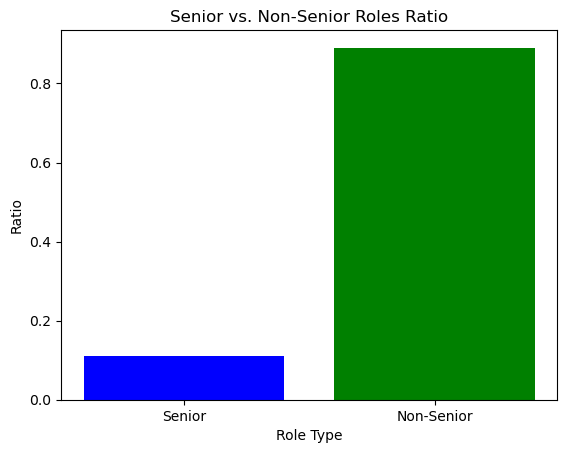

In [63]:
# Data
labels = ['Senior', 'Non-Senior']
ratios = [senior_ratio, non_senior_ratio]

# Create a bar plot
plt.bar(labels, ratios, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Role Type')
plt.ylabel('Ratio')
plt.title('Senior vs. Non-Senior Roles Ratio')

# Show the plot
plt.show()


I can take this to mean that there are much more junior or mid roles than the senior roles. Therefore even new people to the dat science world still stand a good chance of getting a junior role.

### Availability of jobs per sector

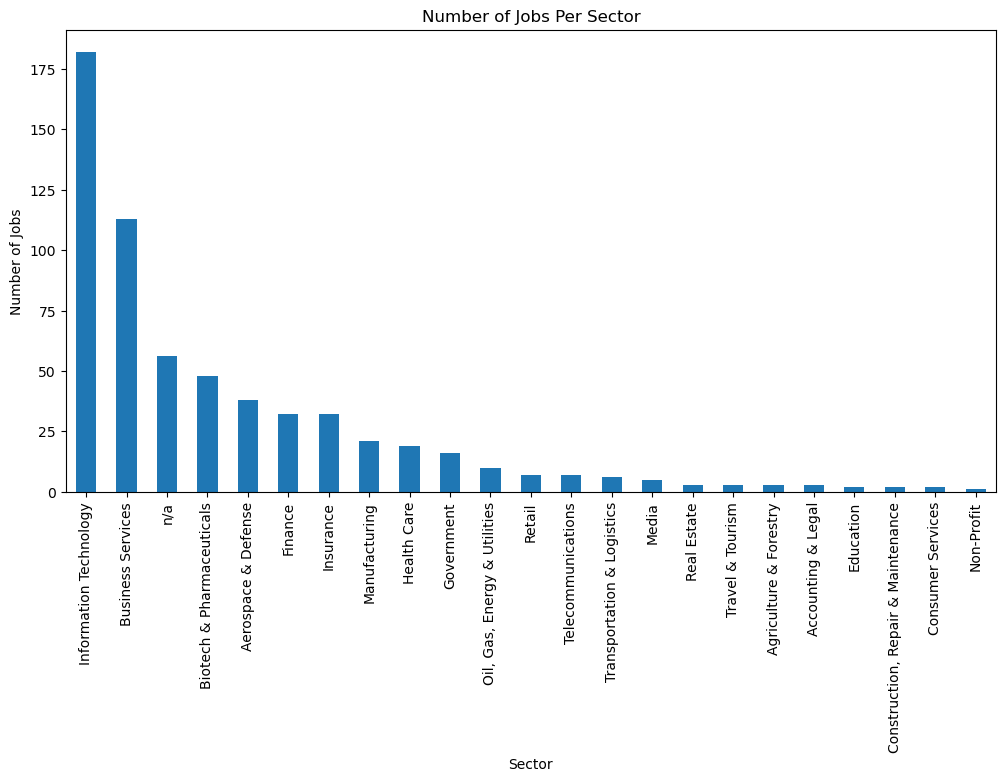

In [64]:
# Finding out the distribution of jobs per sector
# Get the counts of jobs per sector
sector_counts = ds['Sector'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sector_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs Per Sector')

# Show the plot
plt.show()


As expected, the Information Technology sector has the most number of job postings

### Average salary per sector

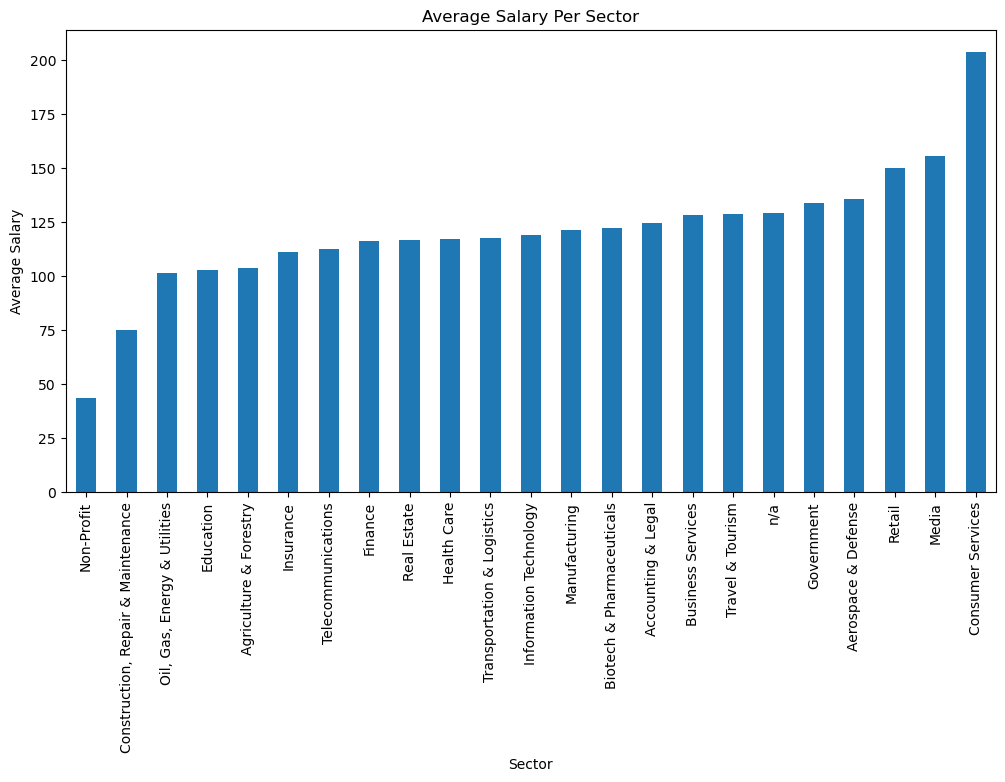

In [65]:
# Group data by sector and calculate the average salary
average_salary_per_sector = ds.groupby('Sector')['Avg Salary'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
average_salary_per_sector.sort_values().plot(kind='bar')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.title('Average Salary Per Sector')

# Show the plot
plt.show()


### Maximum salary per sector

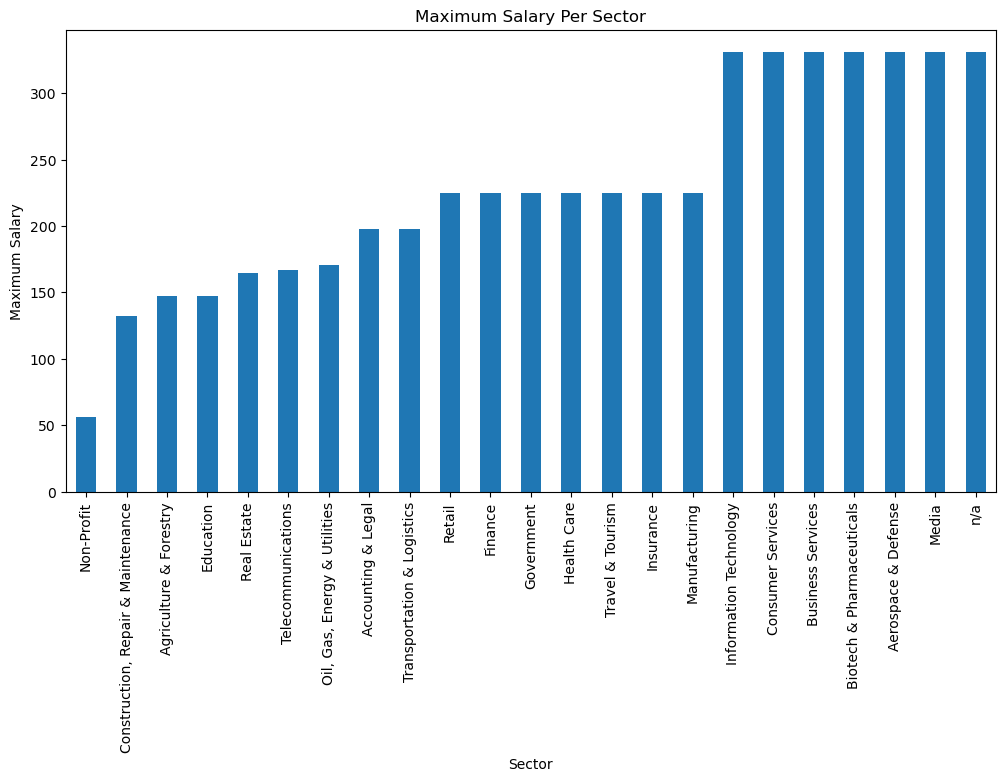

In [66]:
# Taking a look at the secto with the maximum salary
# Group data by sector and calculate the maximum salary
max_salary_per_sector = ds.groupby('Sector')['Max Salary'].max()

# Create a bar plot
plt.figure(figsize=(12, 6))
max_salary_per_sector.sort_values().plot(kind='bar')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('Maximum Salary')
plt.title('Maximum Salary Per Sector')

# Show the plot
plt.show()


Consumer services and media seem to be the sectors with both high average salary and maximum salary.  
This might be informative to those job seekers who are looking for the highest paying sectors.

### Required skills per roles

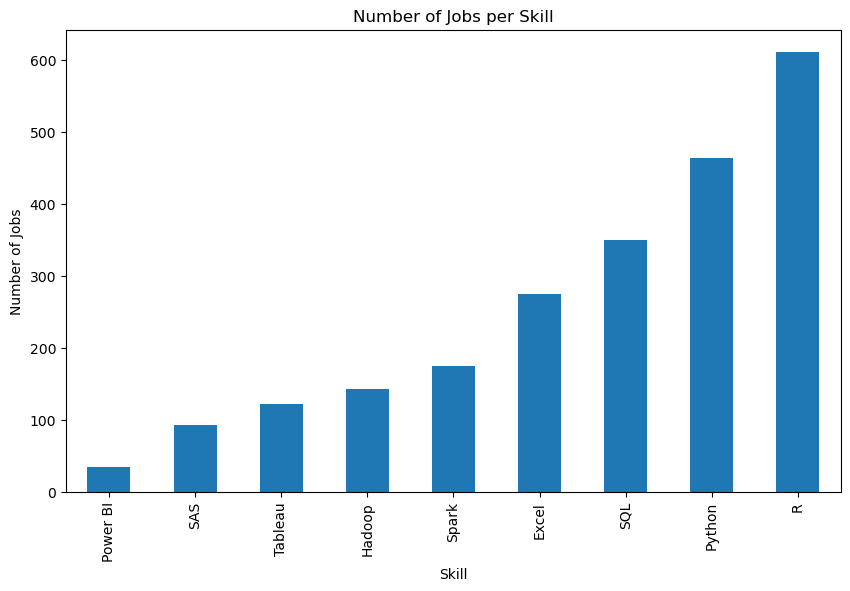

In [67]:
# List of skills to analyze, 
skills = ['Python', 'R','SAS','Excel','SQL','Power BI', 'Tableau', 'Hadoop', 'Spark']

# Create a new DataFrame containing only the specified skills
skill_jobs = ds[skills].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
skill_jobs.sort_values().plot(kind='bar')

# Add labels and title
plt.xlabel('Skill')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs per Skill')

# Show the plot
plt.show()


The most interesting thing for me here is that more job descriptions listed R as a required skill than Python, contrary to public opinion that companies prefer R.

I want to take a further look at which job titles requested for R more.

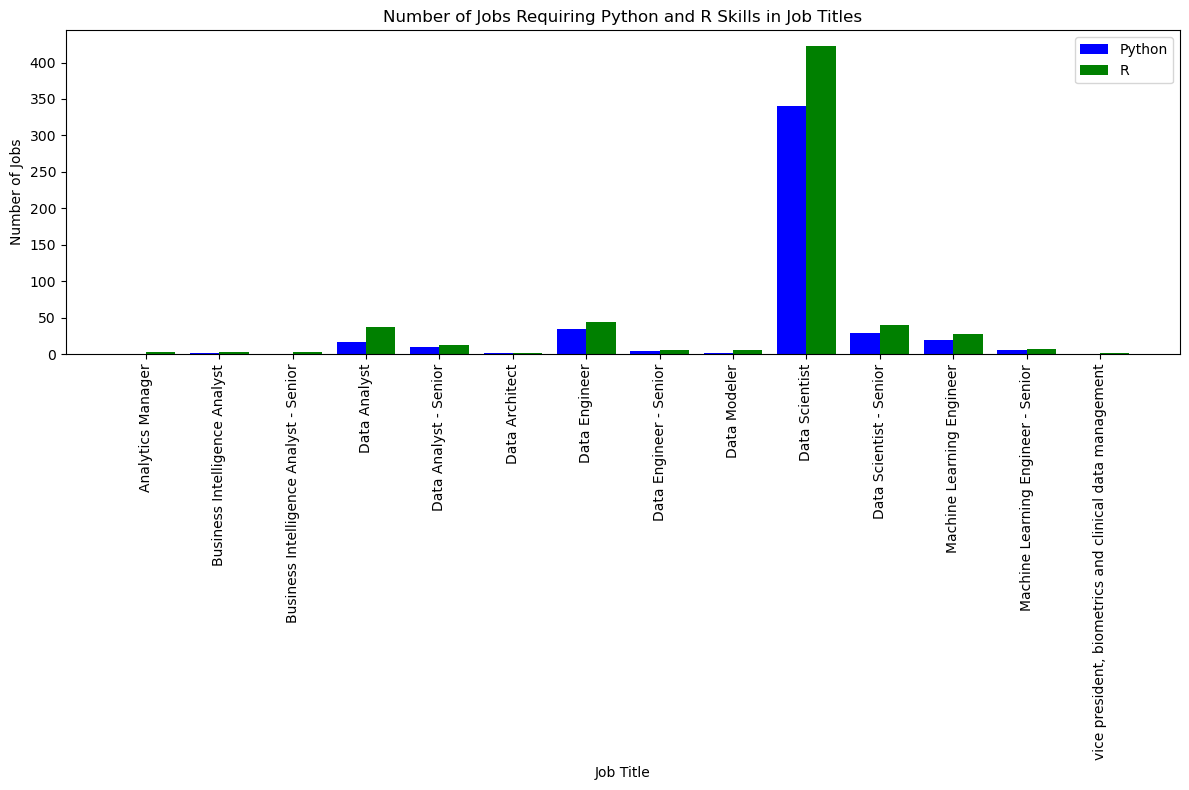

In [68]:
# Create a new DataFrame containing only the 'Job Title', 'Python', and 'R' columns
job_titles_python_r = ds[['Updated_Job_Title', 'Python', 'R']]

# Group the DataFrame by 'Job Title' and sum the counts for each skill
grouped_jobs = job_titles_python_r.groupby('Updated_Job_Title').sum()

# Create an array of indices for the x-axis
indices = np.arange(len(grouped_jobs))

# Get the number of unique job titles
num_titles = len(grouped_jobs)

# Create a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot()

# Plot the counts for Python and R skills
ax.bar(indices - 0.2, grouped_jobs['Python'], width=0.4, color='blue', label='Python')
ax.bar(indices + 0.2, grouped_jobs['R'], width=0.4, color='green', label='R')

# Customize x-axis labels and ticks
plt.xticks(indices, grouped_jobs.index, rotation='vertical')
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs Requiring Python and R Skills in Job Titles')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


From the graph, it is really obvious that across all the job postings, R was more requested than Python

### Companies with the highest ratings

In [69]:
# Group the data by 'Company Name' and calculate the average rating
company_avg_rating = ds.groupby('Company Name')['Rating'].mean()

# Filter companies with average rating of 5
highest_rated_companies = company_avg_rating[company_avg_rating == 5]

# Print the list of companies with highest ratings of 5
print(highest_rated_companies.index.tolist())


['Averity', 'Blue Horizon Tek Solutions', 'ChaTeck Incorporated', 'Cohere Health', 'Expedition Technology, Inc.', 'JCD Staffing', 'Jobot', 'LifeOmic', 'Maxiom', 'Notion Labs', 'PROPRIUS', 'Paige', 'PeopleCom', 'Phantom AI', 'Phoenix Operations Group', 'REE', 'Royce Geospatial', 'SSATI', 'SkillSoniq', 'The Drive Media, Inc.', 'VANTA Partners']


So these are the companies with the best ratings.  

However, I want to see if the ratings actually correlate with high salaries.

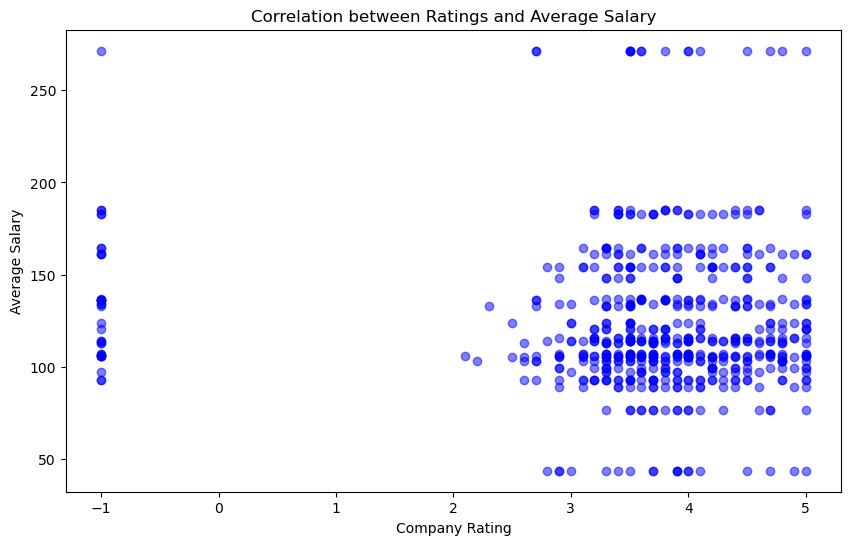

In [70]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ds['Rating'], ds['Avg Salary'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.title('Correlation between Ratings and Average Salary')

# Show the plot
plt.show()


Apparently, there is no correlation between the ratings and the salary.

## Key Insights

Firstly, there is a big opportunity for junior and mid-level roles in the data science space as evident from the analysis compared to the senior roles. While this might be good news for younger data professionals, it implies that there might be limited growth for those who are aspiring for senior data scientists roles.

Then as expected, the Information Technology sector has the highest number of jobs posting, so I would recommend that junior data scientists apply more to jobs in this sector as there would be more openings.

However for those who are motivated by money, even though information technology might have the job opportunities, the average salary is low when compared with some other sectors like Consumer service which has the highest average pay

In the aspect of required skills for a job, R was more requested than Python in the job postings across all roles. Most employers would usually take people with either Python or R knowledge. However, to remain competitive, data scientists may need to pick up both languages

## Conclusion

This project was really interesting for me. I was able to use several python libraries, functions and methods to clean the dataset and also do some analysis and visualizations to share.